In [1]:
from Parser import Parser
from Lexer import Lexer

In [2]:
import pydot
from cStringIO import StringIO

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def to_image(graph):
    pd = pydot.graph_from_dot_data(graph.to_dot())[0]
    png_str = pd.create_png(prog='dot')
    sio = StringIO()
    sio.write(png_str)
    sio.seek(0)
    img = mpimg.imread(sio)
    width = 12
    height = 12
    # plot the image
    plt.figure(figsize=(width, height))
    imgplot = plt.imshow(img, aspect='equal')
    plt.show(block=False)

  0%|          | 0/1 [00:00<?, ?it/s]

vertex: Seednan

lhs Seed1  =>  Start1
adding Chain0
adding Gate0
adding MiniBoss0
adding QuestItem0
adding ItemTest0
adding ChainFinal0
adding End0
adding  Seednan --> Chain0
adding  Chain0 --> Gate0
adding  Gate0 --> MiniBoss0
adding  MiniBoss0 --> QuestItem0
adding  QuestItem0 --> ItemTest0
adding  ItemTest0 --> ChainFinal0
adding  ChainFinal0 --> End0
adding  Gate0 --> MiniBoss0
adding  MiniBoss0 --> QuestItem0
adding  QuestItem0 --> ItemTest0
adding  ItemTest0 --> ChainFinal0
lhs->rhs Seed1 Start1


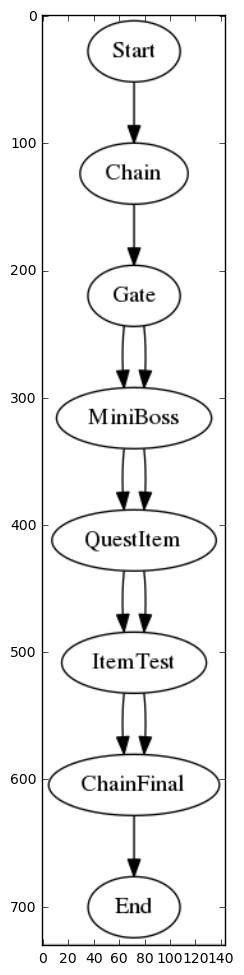

lhs ChainFinal1  =>  Chain1
lhs End2  =>  End2
adding Hook0
adding Gate0
adding LockFinal0
adding LevelBoss0
adding Test0
adding KeyFinal0
adding Hook0
adding  ChainFinal0 --> Hook0
adding  ChainFinal0 --> Gate0
adding  Gate0 --> LockFinal0
adding  LockFinal0 --> LevelBoss0
adding  LevelBoss0 --> End0
adding  Gate0 --> LockFinal0
adding  LockFinal0 --> LevelBoss0
adding  LevelBoss0 --> End0
adding  ChainFinal0 --> Test0
adding  Test0 --> KeyFinal0
adding  KeyFinal0 --> LockFinal0
adding  Test0 --> KeyFinal0
adding  Test0 --> Hook0
deleting ChainFinal1-->End2
lhs->rhs ChainFinal1 Chain1
lhs->rhs End2 End2


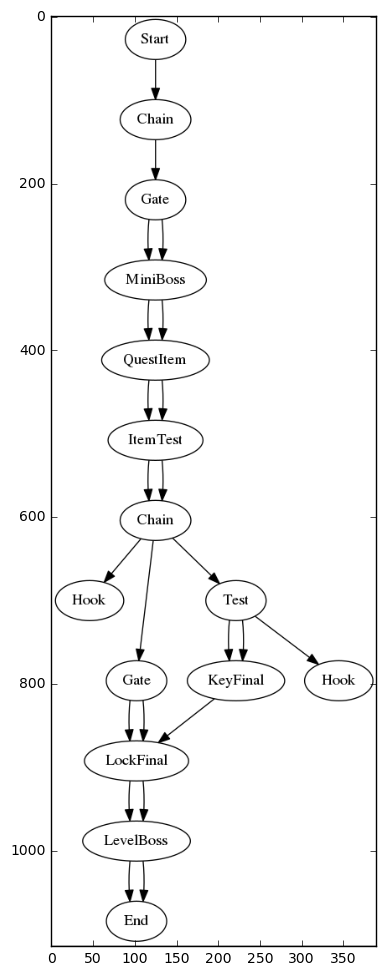

lhs Chain1-->Gate2  =>  ChainParallel1-->Gate2
lhs Gate2  =>  Gate2
lhs Chain1  =>  ChainParallel1
lhs->rhs Chain1-->Gate2 ChainParallel1-->Gate2
lhs->rhs Gate2 Gate2
lhs->rhs Chain1 ChainParallel1


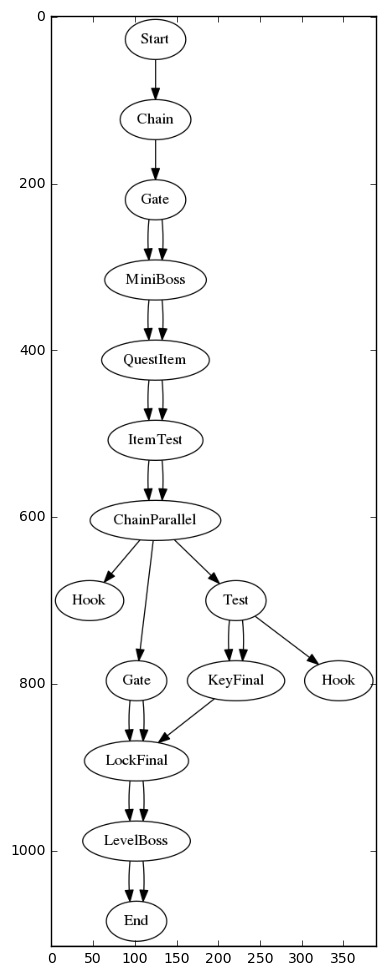

lhs Chain1-->Gate2  =>  ChainParallel1-->Gate2
lhs Gate2  =>  Gate2
lhs Chain1  =>  ChainParallel1
lhs->rhs Chain1-->Gate2 ChainParallel1-->Gate2
lhs->rhs Gate2 Gate2
lhs->rhs Chain1 ChainParallel1


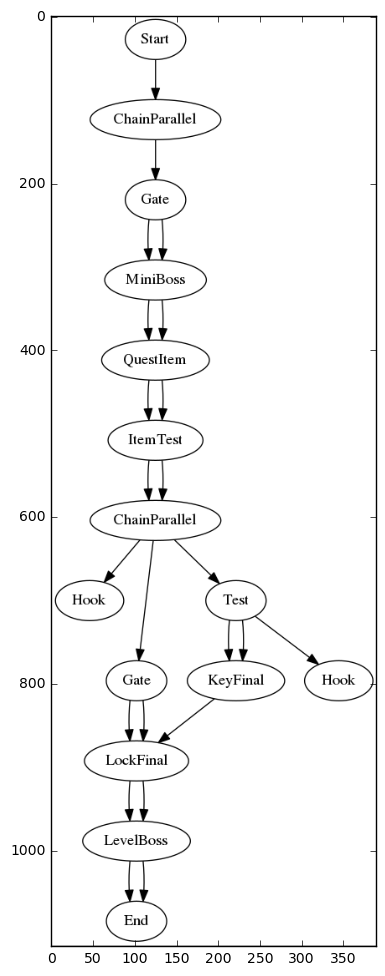

lhs Gate2  =>  LockMulti2
lhs ChainParallel1  =>  Fork1
adding MultiPieceKey0
adding MultiPieceKey0
adding MultiPieceKey0
adding  ChainParallel0 --> MultiPieceKey0
adding  MultiPieceKey0 --> Gate0
adding  ChainParallel0 --> MultiPieceKey0
adding  MultiPieceKey0 --> Gate0
adding  ChainParallel0 --> MultiPieceKey0
adding  MultiPieceKey0 --> Gate0
deleting ChainParallel1-->Gate2
lhs->rhs Gate2 LockMulti2
lhs->rhs ChainParallel1 Fork1


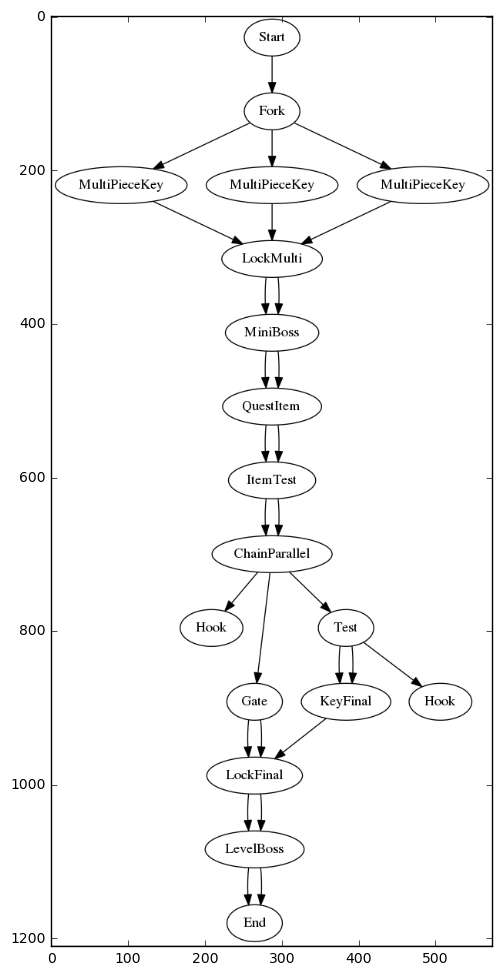

lhs Fork1  =>  Nothing1
adding Hook0
adding Hook0
adding  Fork0 --> Hook0
adding  Fork0 --> Hook0
lhs->rhs Fork1 Nothing1


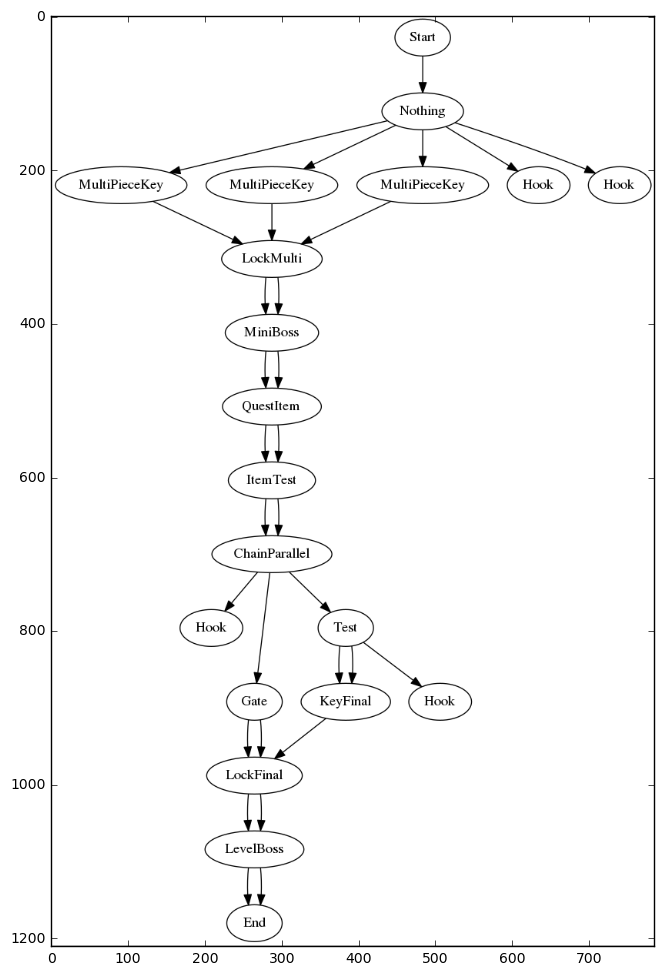

lhs Hook1  =>  Nothing1
lhs->rhs Hook1 Nothing1


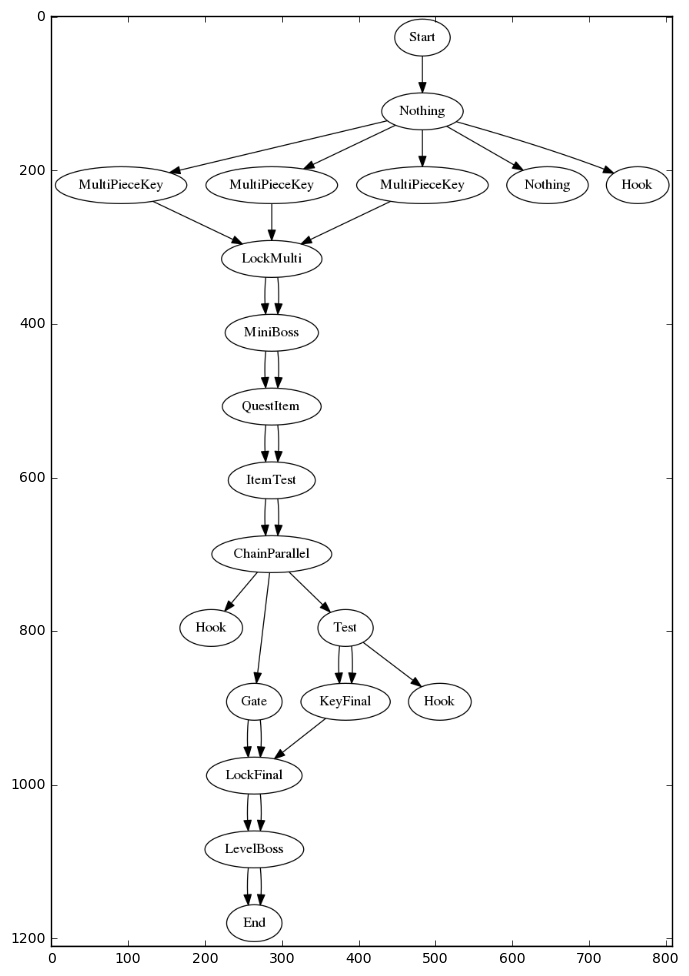

lhs Gate2  =>  LockMulti2
lhs ChainParallel1  =>  Fork1
adding MultiPieceKey0
adding MultiPieceKey0
adding MultiPieceKey0
adding  ChainParallel0 --> MultiPieceKey0
adding  MultiPieceKey0 --> Gate0
adding  ChainParallel0 --> MultiPieceKey0
adding  MultiPieceKey0 --> Gate0
adding  ChainParallel0 --> MultiPieceKey0
adding  MultiPieceKey0 --> Gate0
deleting ChainParallel1-->Gate2
lhs->rhs Gate2 LockMulti2
lhs->rhs ChainParallel1 Fork1


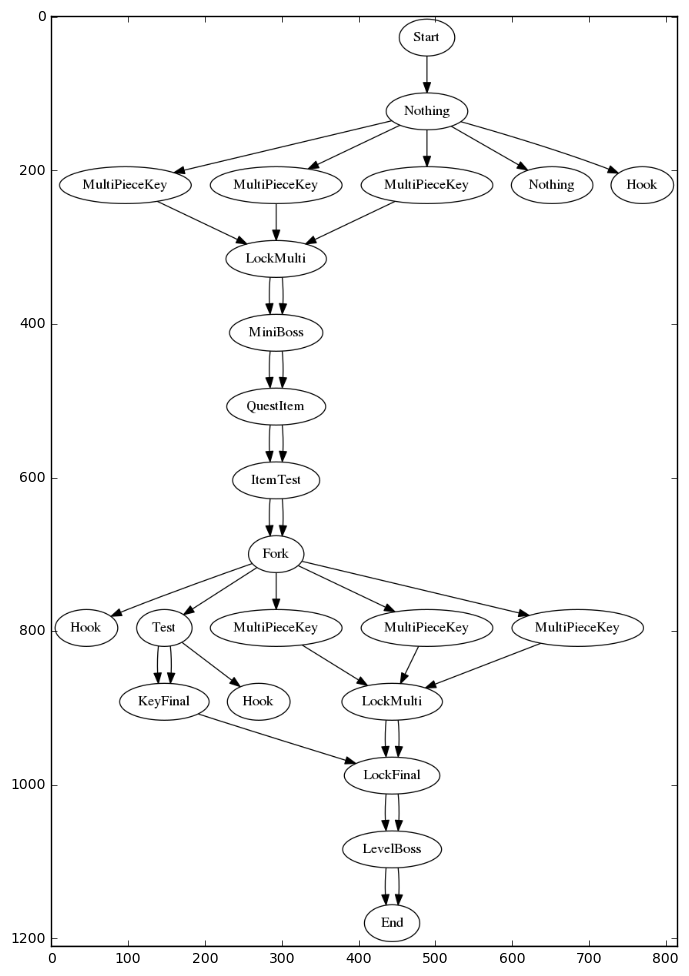

lhs Hook1  =>  Nothing1
lhs->rhs Hook1 Nothing1


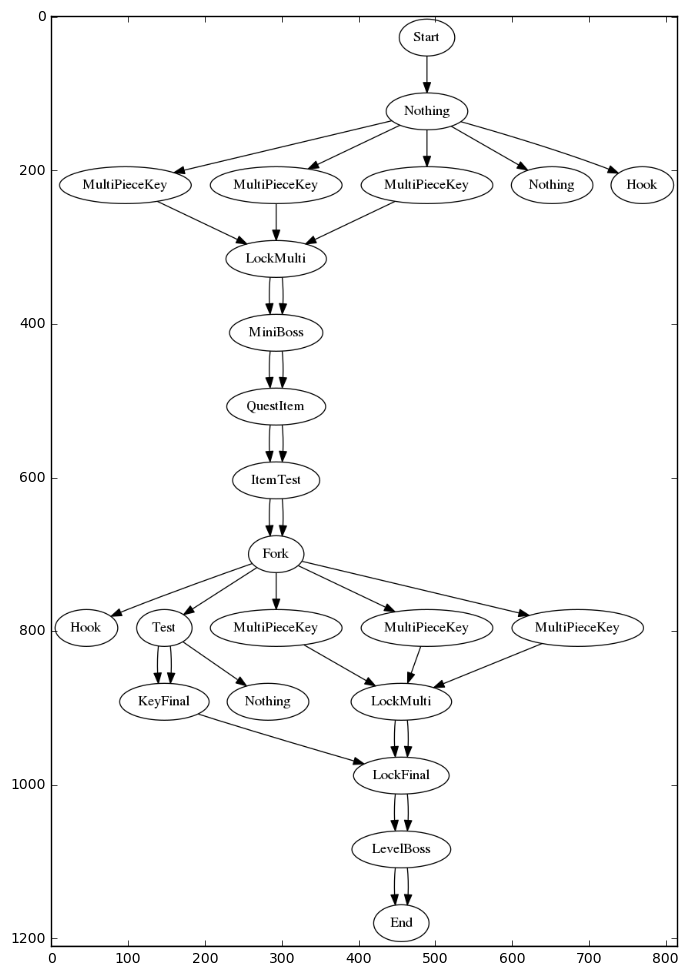

lhs Fork1  =>  Fork1
lhs MultiPieceKey2  =>  MultiPieceKey2
adding Test0
adding  Fork0 --> Test0
adding  Test0 --> MultiPieceKey0
adding  Test0 --> MultiPieceKey0
deleting Fork1-->MultiPieceKey2
lhs->rhs Fork1 Fork1
lhs->rhs MultiPieceKey2 MultiPieceKey2


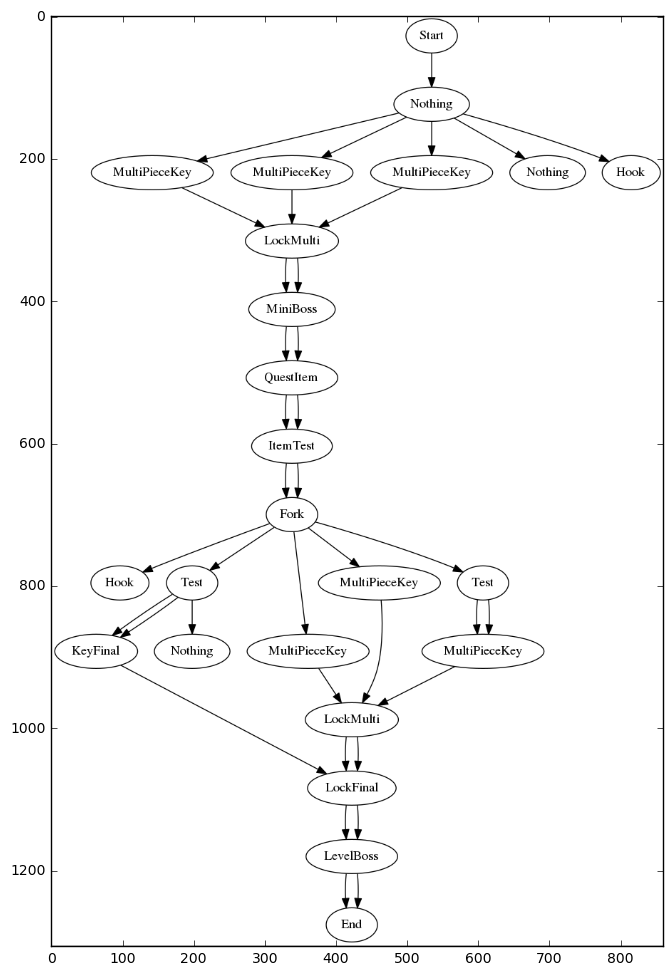

lhs Fork1  =>  Fork1
lhs MultiPieceKey2  =>  MultiPieceKey2
adding Key0
adding Lock0
adding Hook0
adding  Fork0 --> Key0
adding  Key0 --> Lock0
adding  Lock0 --> MultiPieceKey0
adding  Lock0 --> MultiPieceKey0
adding  Lock0 --> Hook0
adding  Lock0 --> Hook0
deleting Fork1-->MultiPieceKey2
lhs->rhs Fork1 Fork1
lhs->rhs MultiPieceKey2 MultiPieceKey2


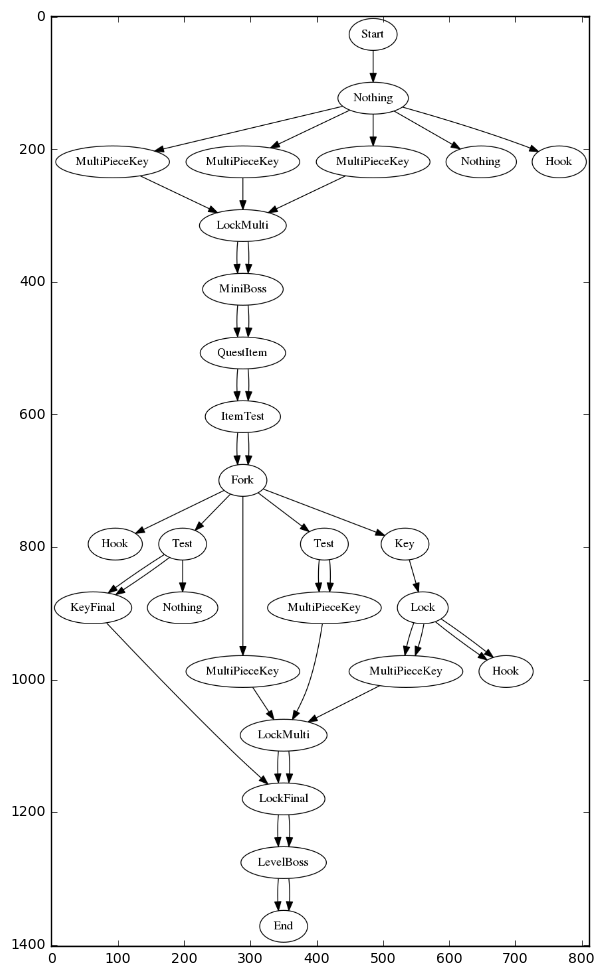

lhs Fork1  =>  Fork1
lhs MultiPieceKey2  =>  MultiPieceKey2
adding Test0
adding  Fork0 --> Test0
adding  Test0 --> MultiPieceKey0
adding  Test0 --> MultiPieceKey0
deleting Fork1-->MultiPieceKey2
lhs->rhs Fork1 Fork1
lhs->rhs MultiPieceKey2 MultiPieceKey2


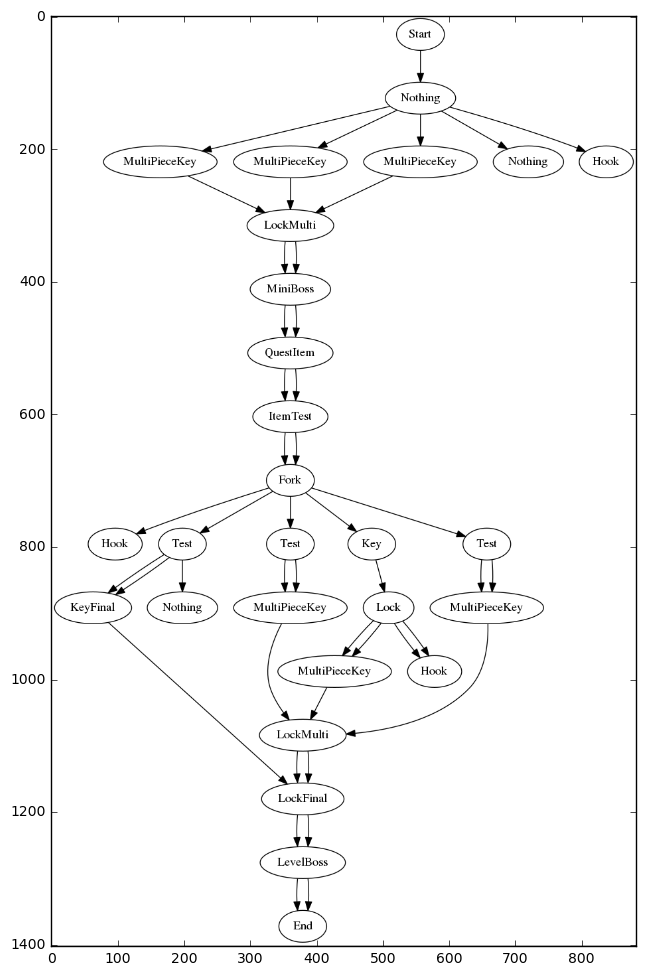

lhs Hook1  =>  Nothing1
lhs->rhs Hook1 Nothing1


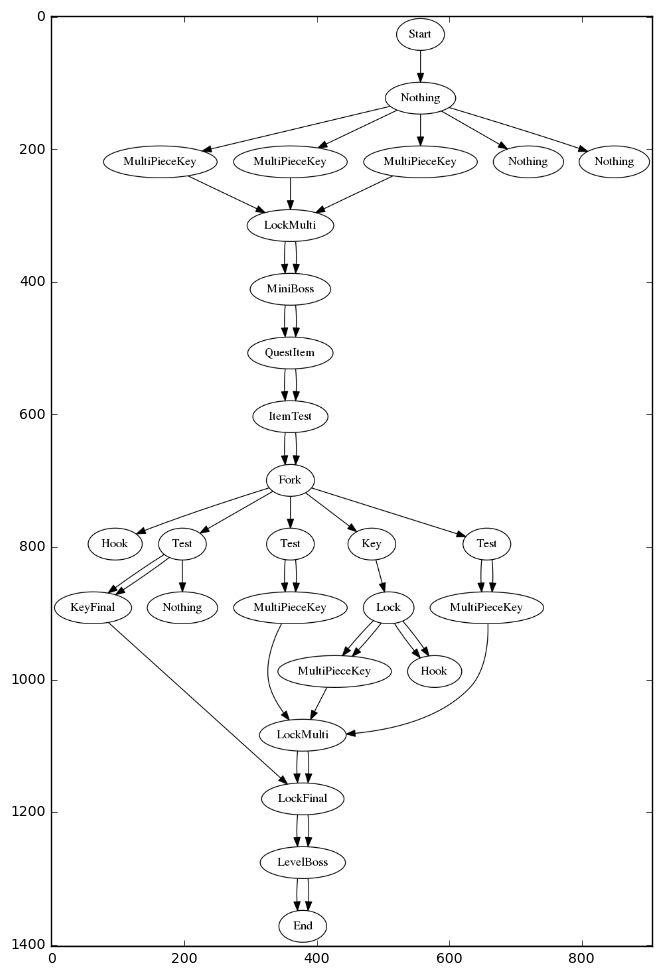

lhs Fork1  =>  Fork1
lhs Key2  =>  Key2
adding TestSecret0
adding  Fork0 --> TestSecret0
adding  TestSecret0 --> Key0
adding  TestSecret0 --> Key0
deleting Fork1-->Key2
lhs->rhs Fork1 Fork1
lhs->rhs Key2 Key2


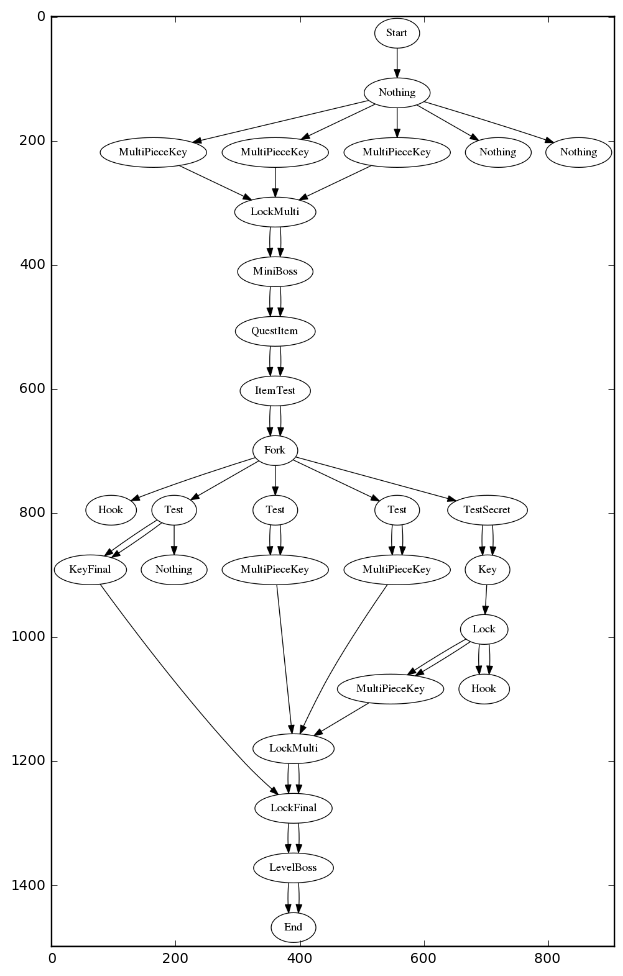

lhs Hook1  =>  Test1
adding Item0
adding  Hook0 --> Item0
adding  Hook0 --> Item0
lhs->rhs Hook1 Test1


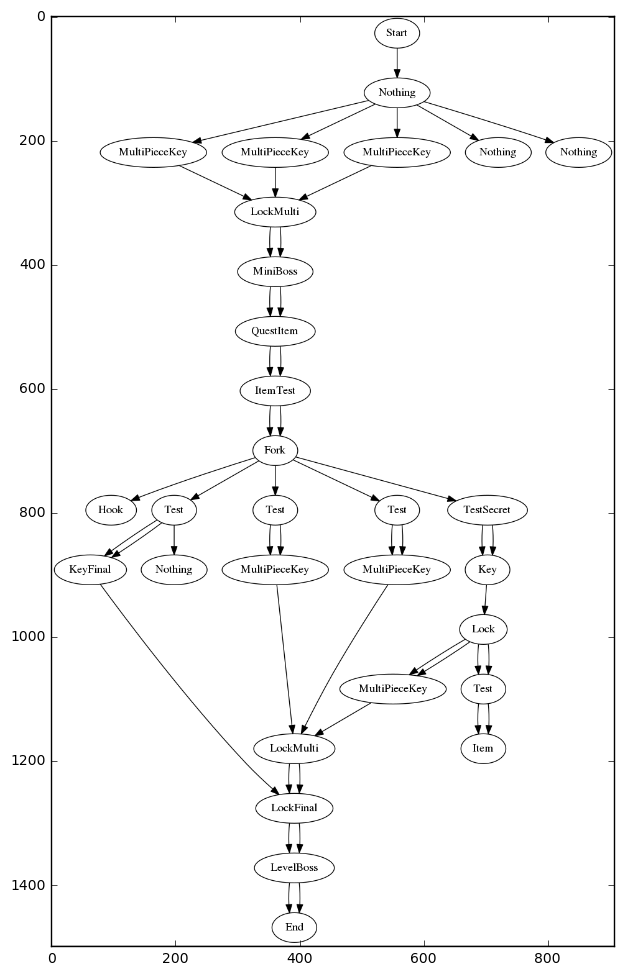

lhs Hook1  =>  Test1
adding Item0
adding  Hook0 --> Item0
adding  Hook0 --> Item0
lhs->rhs Hook1 Test1


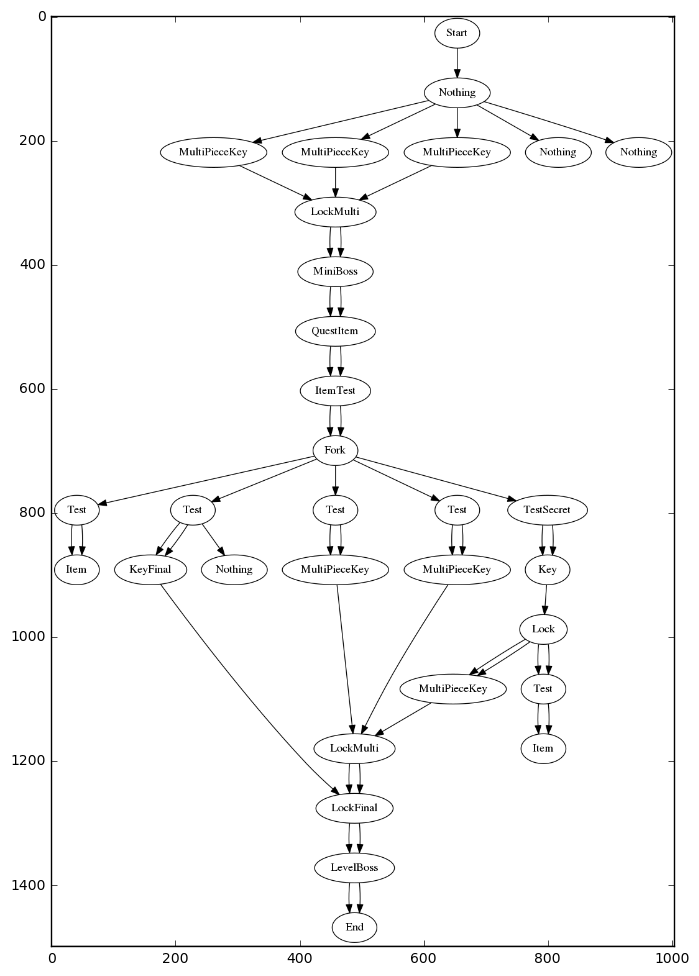

lhs Fork1  =>  Nothing1
adding Hook0
adding Hook0
adding  Fork0 --> Hook0
adding  Fork0 --> Hook0
lhs->rhs Fork1 Nothing1


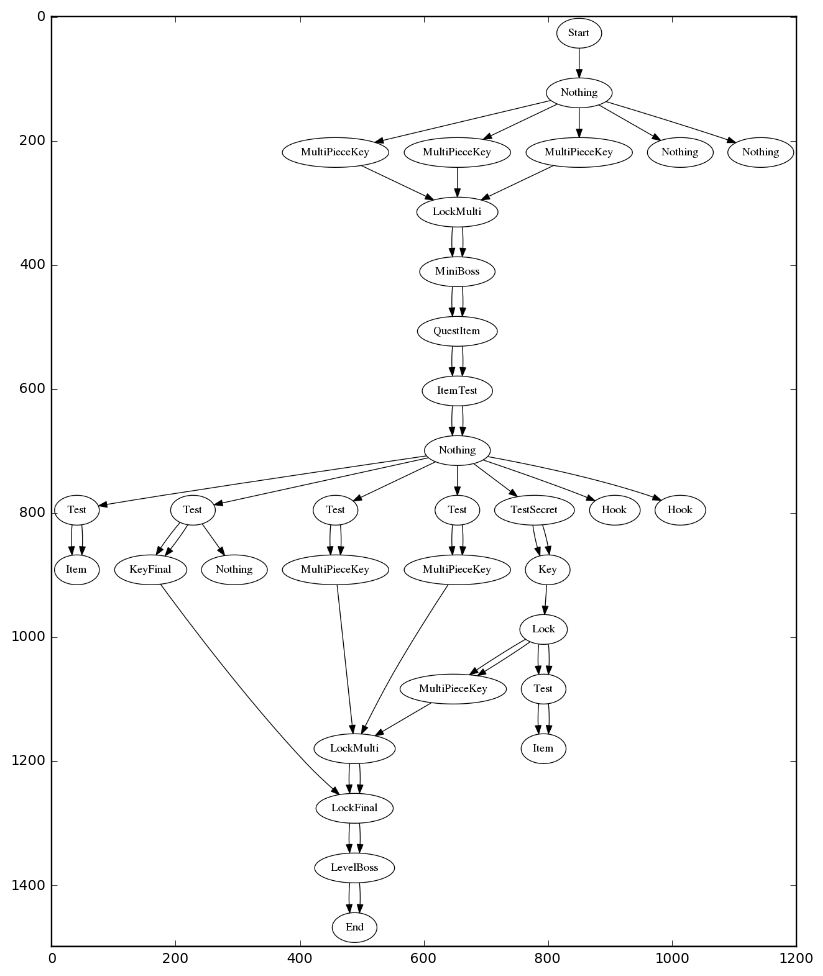

lhs Hook1  =>  TestSecret1
adding Item0
adding  Hook0 --> Item0
adding  Hook0 --> Item0
lhs->rhs Hook1 TestSecret1


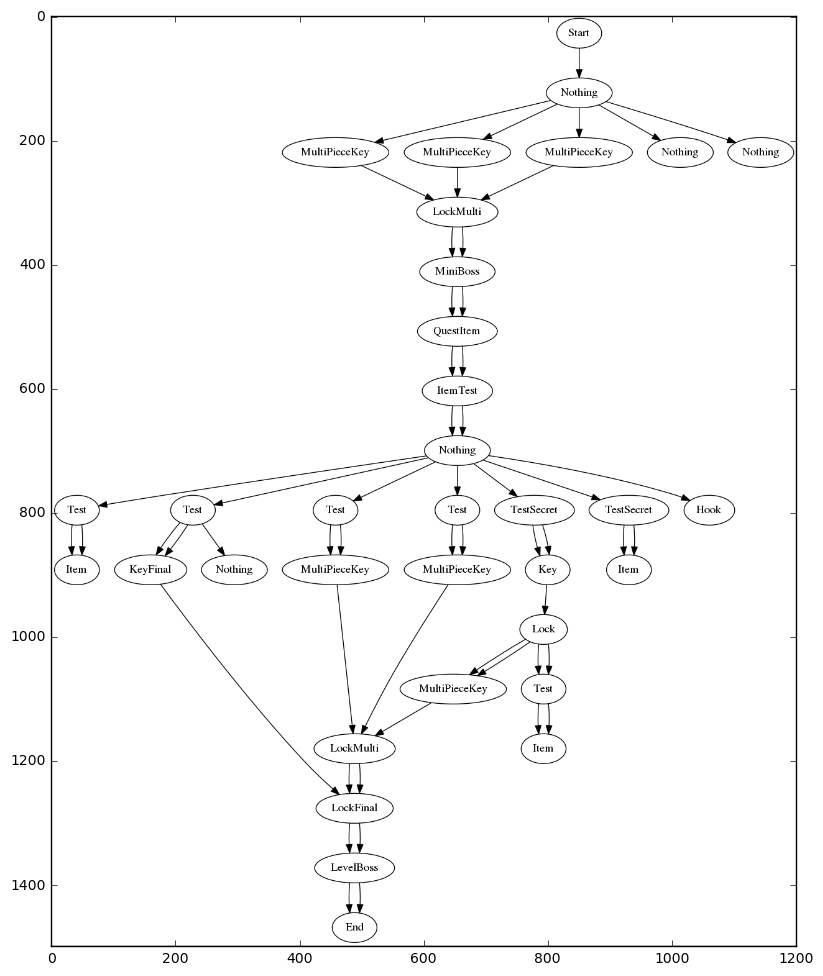

lhs Hook1  =>  TestSecret1
adding Item0
adding  Hook0 --> Item0
adding  Hook0 --> Item0
lhs->rhs Hook1 TestSecret1


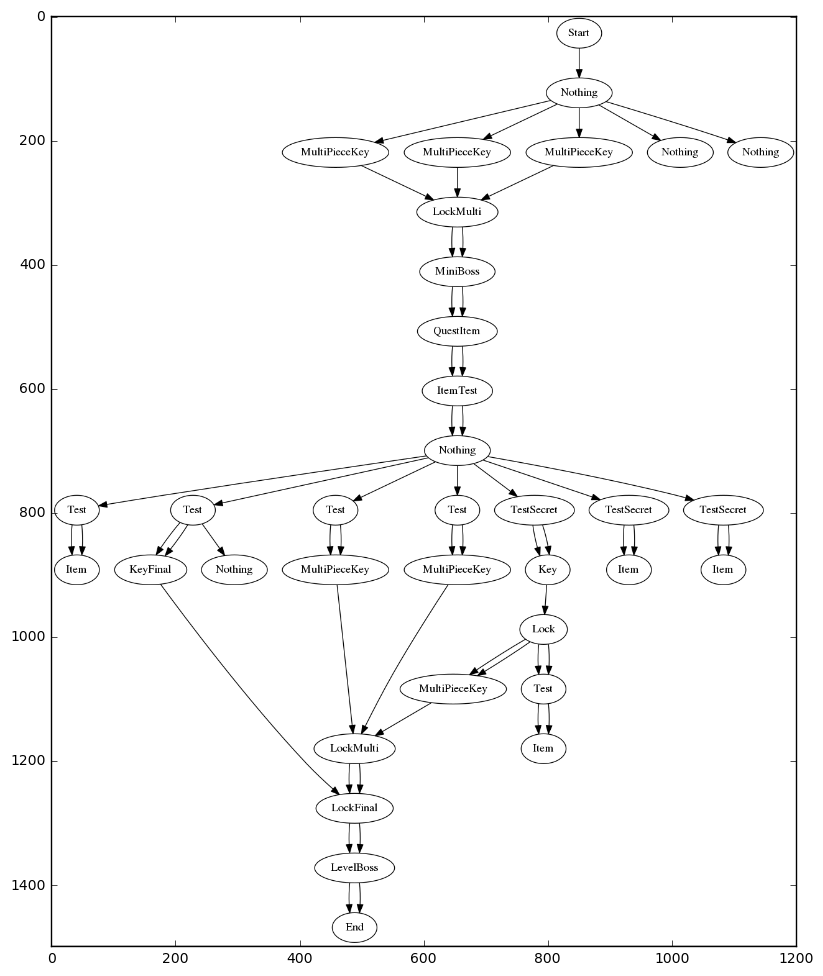

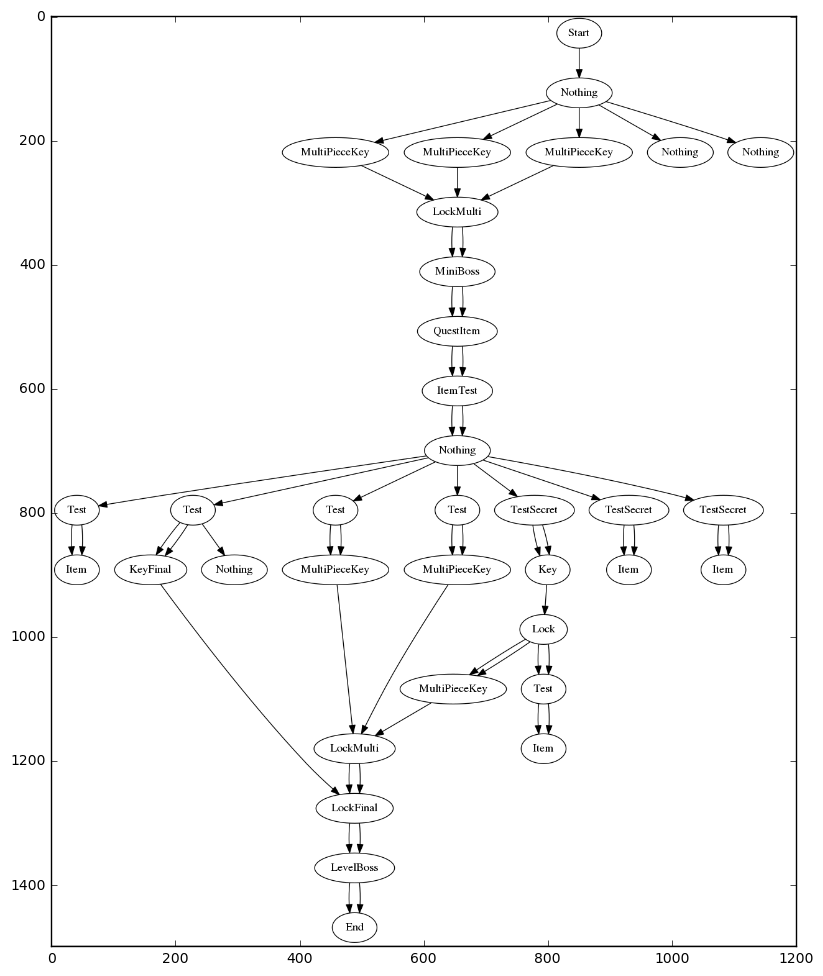

100%|██████████| 1/1 [00:11<00:00, 11.85s/it]


In [3]:
import random
from tqdm import tqdm

p = Parser(Lexer(open('JorisStyle.txt').read()))
p.parse()
print p.startGraph

paths = []
for ii in tqdm(range(1)):
    cloned = p.startGraph.clone()
    #to_image(cloned)
    acceptable = []
    for rule in p.productions:
        #print rule
        matches = rule.find_matches(cloned)
        if len(matches) > 0:
            acceptable.append((rule,matches))
    path = []
    while len(acceptable) > 0:
        rule, matches = random.choice(acceptable)
        match = random.choice(matches)
        #print len(matches)
        #print '\nBEFORE:\n',cloned
        #print 'Applying {\n', rule.lhs,'\n=>\n',rule.rhs,'\n}\n'
        
        path.append(rule)
        rule.apply_to(cloned,match)
        #print '\nAFTER:\n',cloned
        acceptable = []
        for rule in p.productions:
            #print '\nRule LHS\n',rule.lhs
            #print 'Rule RHS\n',rule.rhs
            matches = rule.find_matches(cloned)
            if len(matches) > 0:
                acceptable.append((rule,matches))
        to_image(cloned)
    to_image(cloned)
    paths.append(path)

    


